# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [102]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [103]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 9311 files belonging to 12 classes.


### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3995 files belonging to 12 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [105]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [106]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [107]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [108]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [109]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [110]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [111]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [112]:
cnn.add(tf.keras.layers.Flatten())

In [113]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [114]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [115]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=12,activation='softmax'))

### Compiling and Training Phase

In [116]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [117]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_51 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_53 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

In [118]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
291/291 [==============================] - 39s 129ms/step - loss: 1.0853 - accuracy: 0.6141 - val_loss: 0.6169 - val_accuracy: 0.7474
Epoch 2/10
291/291 [==============================] - 33s 112ms/step - loss: 0.5829 - accuracy: 0.7789 - val_loss: 0.4076 - val_accuracy: 0.8471
Epoch 3/10
291/291 [==============================] - 33s 113ms/step - loss: 0.4108 - accuracy: 0.8459 - val_loss: 0.3131 - val_accuracy: 0.8798
Epoch 4/10
291/291 [==============================] - 33s 112ms/step - loss: 0.2888 - accuracy: 0.8992 - val_loss: 0.2712 - val_accuracy: 0.9156
Epoch 5/10
291/291 [==============================] - 33s 113ms/step - loss: 0.2302 - accuracy: 0.9188 - val_loss: 0.2445 - val_accuracy: 0.9194
Epoch 6/10
291/291 [==============================] - 33s 113ms/step - loss: 0.1586 - accuracy: 0.9446 - val_loss: 0.1615 - val_accuracy: 0.9492
Epoch 7/10
291/291 [==============================] - 33s 112ms/step - loss: 0.1448 - accuracy: 0.9507 - val_loss: 0.1779 - val_ac

## Evaluating Model

In [119]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

291/291 [==============================] - 12s 41ms/step - loss: 0.0760 - accuracy: 0.9745
Training accuracy: 0.9745462536811829


In [120]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

125/125 [==============================] - 6s 46ms/step - loss: 0.1831 - accuracy: 0.9469
Validation accuracy: 0.9469336867332458


### Saving Model

In [121]:
cnn.save('trained_model.keras')

In [122]:
training_history.history #Return Dictionary of history

{'loss': [1.085286021232605,
  0.5829334855079651,
  0.4108385145664215,
  0.2888118028640747,
  0.23018811643123627,
  0.15862427651882172,
  0.1447579711675644,
  0.10628699511289597,
  0.11170368641614914,
  0.07980775833129883],
 'accuracy': [0.6141123175621033,
  0.7788637280464172,
  0.8458812236785889,
  0.8991515636444092,
  0.918805718421936,
  0.9445816874504089,
  0.9507034420967102,
  0.9623026251792908,
  0.9625174403190613,
  0.9720760583877563],
 'val_loss': [0.6169044375419617,
  0.40759849548339844,
  0.31310921907424927,
  0.2711752951145172,
  0.24447546899318695,
  0.16146209836006165,
  0.17788131535053253,
  0.2434529960155487,
  0.1396269053220749,
  0.1830603927373886],
 'val_accuracy': [0.7474343180656433,
  0.8470588326454163,
  0.8798497915267944,
  0.9156445264816284,
  0.9193992614746094,
  0.9491865038871765,
  0.9436795711517334,
  0.9193992614746094,
  0.9536921381950378,
  0.9469336867332458]}

In [123]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [124]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

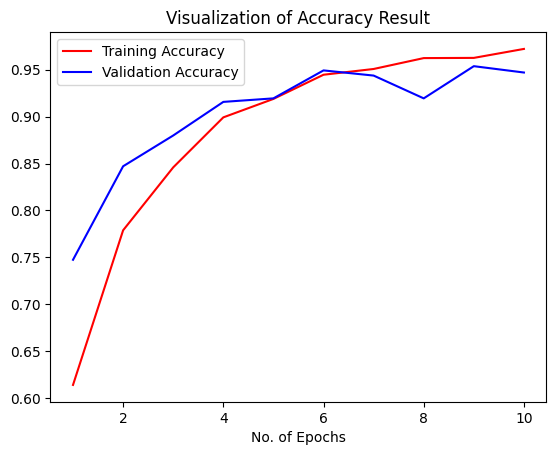

In [125]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [126]:
class_name = validation_set.class_names

In [127]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3995 files belonging to 12 classes.


In [128]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

3995/3995 [==============================] - 19s 5ms/step


In [129]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [130]:
Y_true

<tf.Tensor: shape=(3995,), dtype=int64, numpy=array([ 0,  0,  0, ..., 11, 11, 11], dtype=int64)>

In [131]:
predicted_categories

<tf.Tensor: shape=(3995,), dtype=int64, numpy=array([ 3,  1,  3, ..., 11, 11, 11], dtype=int64)>

In [132]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [133]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                             precision    recall  f1-score   support

         Cinammon_RoughBark       0.76      0.58      0.66        48
      Cinammon_StripeCanker       0.86      0.71      0.77        51
   Cinammon__healthy_leaves       0.87      0.77      0.81       172
Cinammon__leaf_spot_disease       0.81      0.73      0.77       131
            Coffee__Healthy       1.00      1.00      1.00       600
          Coffee__Leaf_rust       0.94      0.94      0.94       310
              Coffee__Miner       0.95      0.98      0.97       600
              Coffee__Phoma       0.93      0.93      0.93       333
                Tea_Healthy       0.96      0.98      0.97       981
             Tea_algal_spot       0.92      0.96      0.94       300
            Tea_gray_blight       0.97      0.98      0.98       300
          Tea_red_leaf_spot       0.99      0.95      0.97       169

                   accuracy                           0.95      3995
                  macro avg     

### Confusion Matrix Visualization

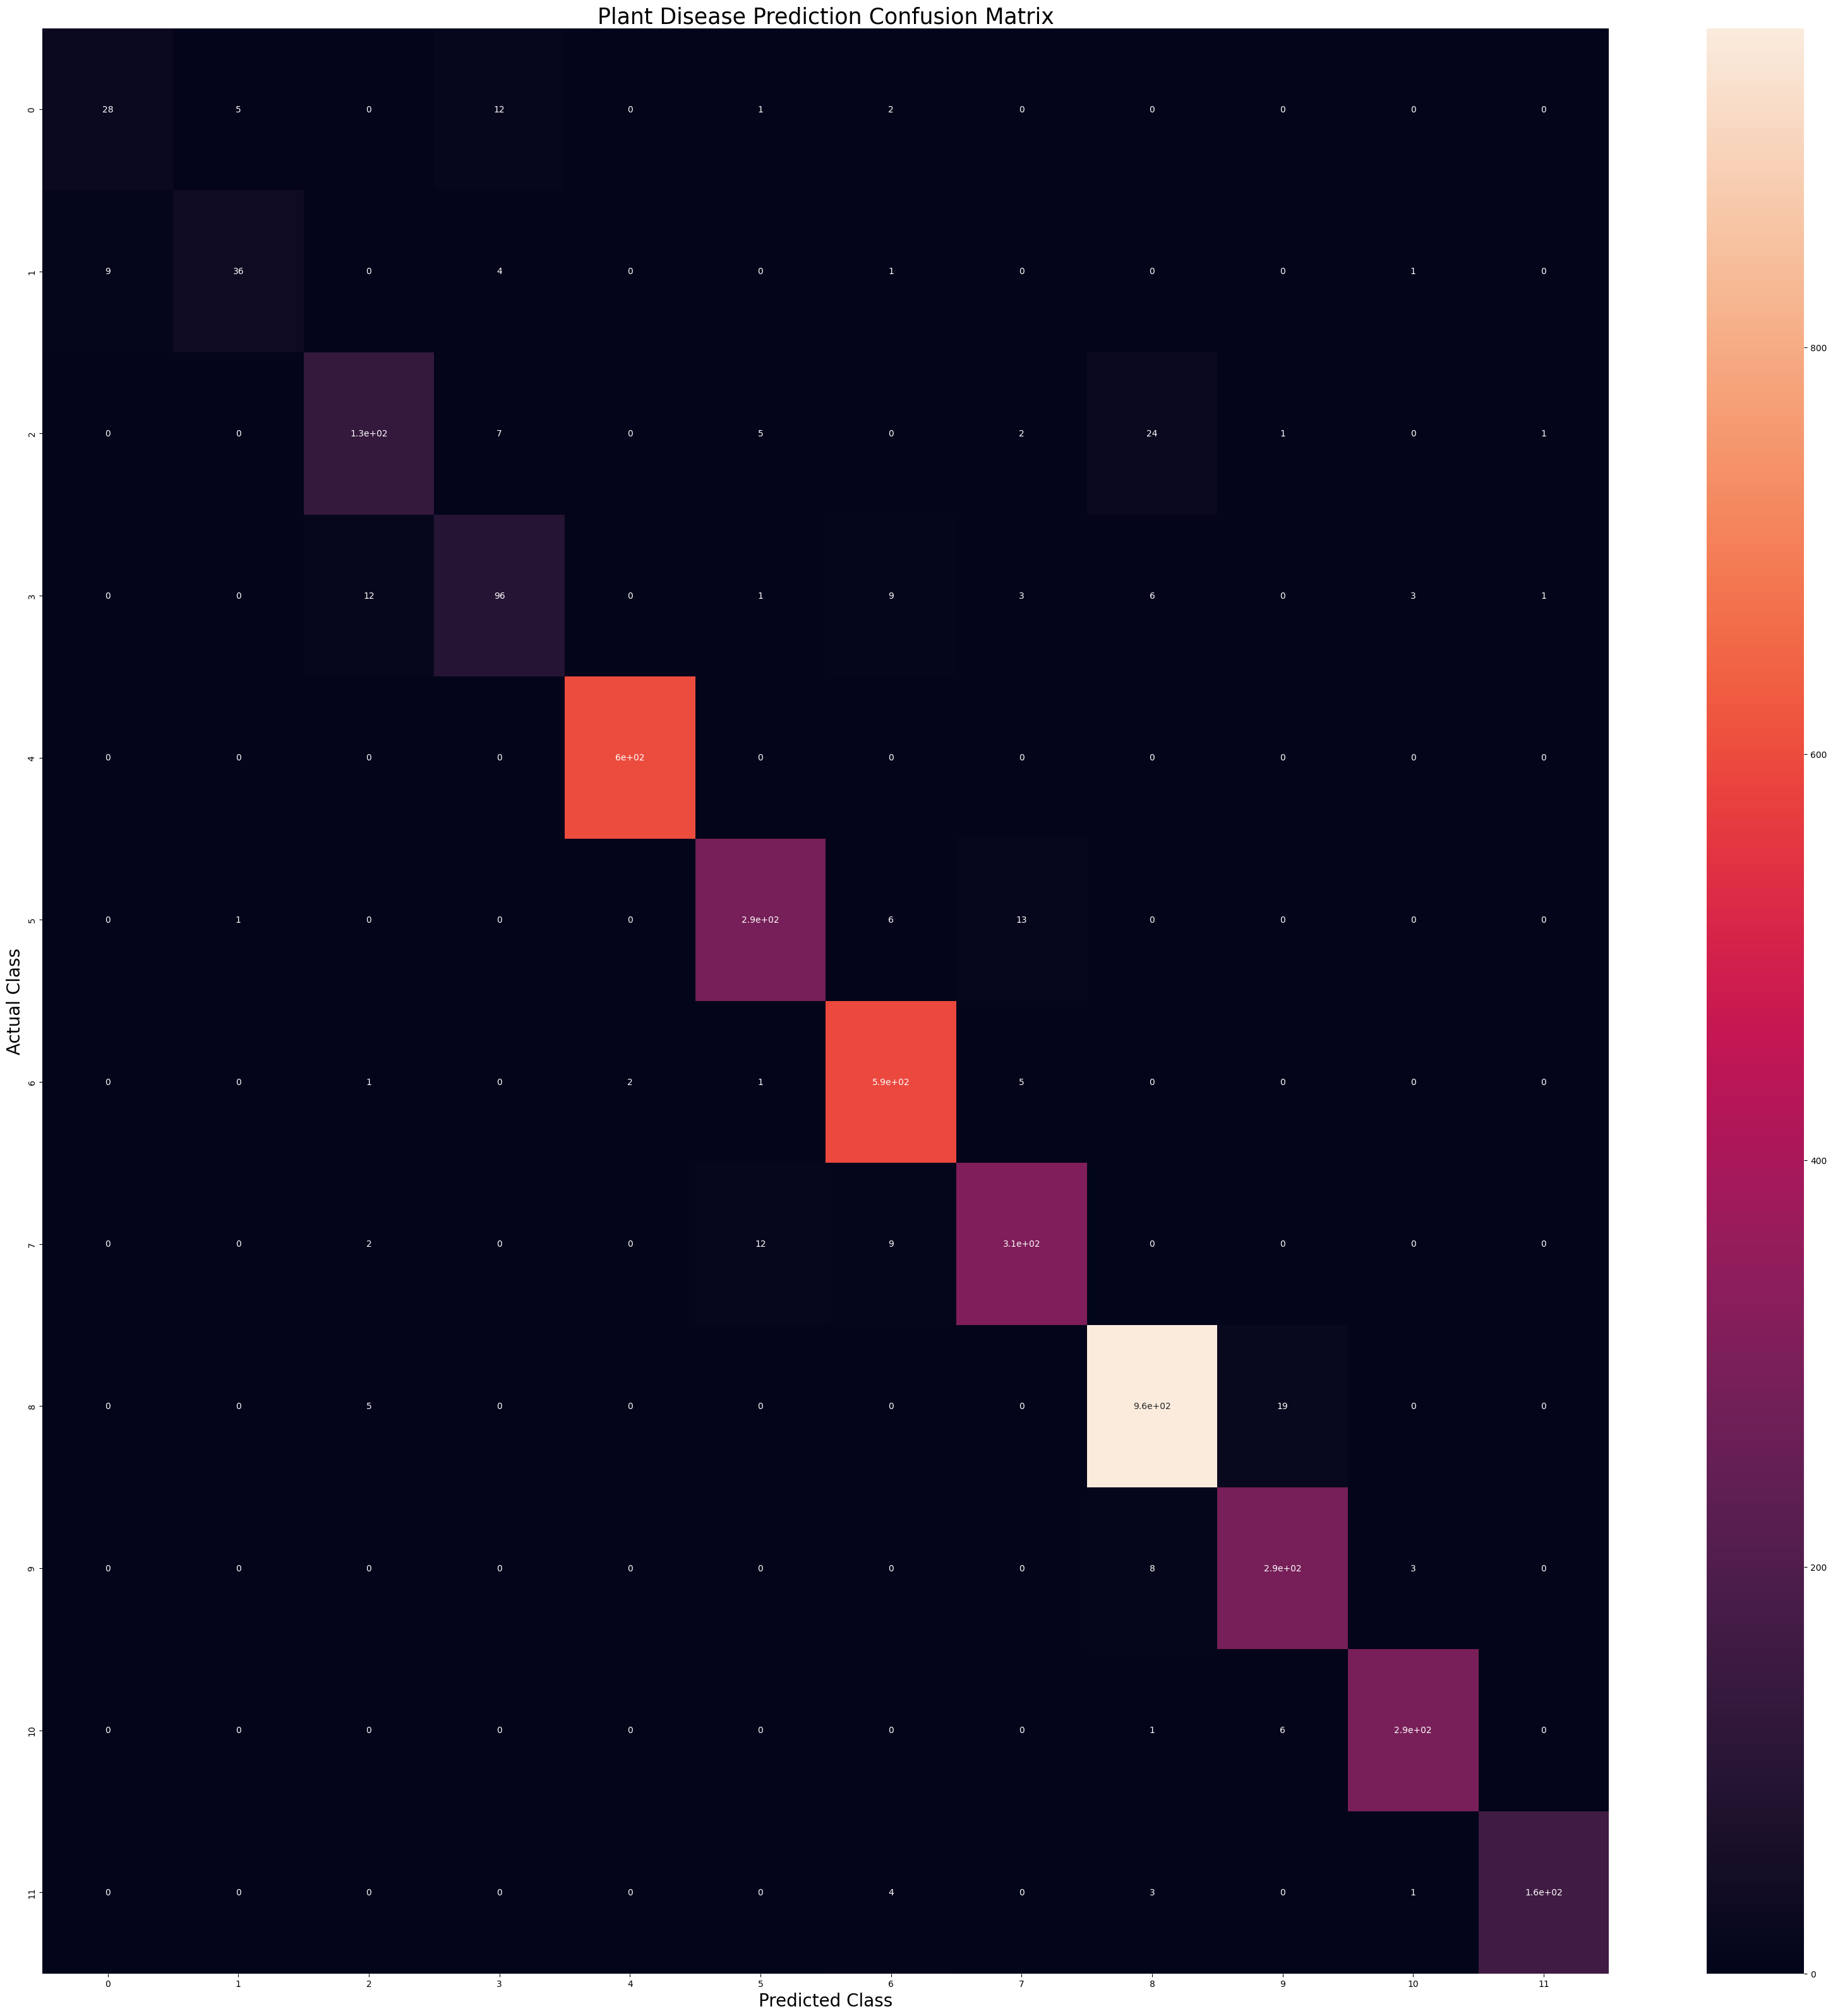

In [134]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()